In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [9]:
classes = ['zero','one','two','three','four','five','six','seven','eight','nine']

In [12]:
def show_digit(X,y,index):
  plt.figure(figsize=(12,4))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  

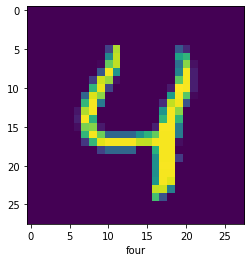

In [17]:
show_digit(X_test,y_test,4)

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

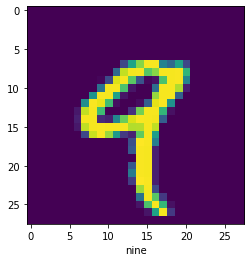

In [22]:
show_digit(X_train,y_train,4)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
ann = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
    
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5054 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2524 - accuracy: 0.9280
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2022 - accuracy: 0.9430
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1696 - accuracy: 0.9524
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1456 - accuracy: 0.9594


In [28]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1358 - accuracy: 0.9589


[0.13583220541477203, 0.958899974822998]

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.93      0.95       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.94      0.94      0.94       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [32]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [33]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.1341 - accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0459 - accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0315 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0228 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0174 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0099 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [35]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0414 - accuracy: 0.9903


[0.04140409082174301, 0.9902999997138977]

In [36]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

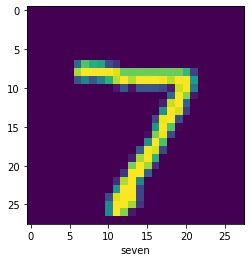

In [37]:
show_digit(X_test,y_test,0)

In [38]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.8030719e-15, 7.7092009e-17, 7.9259624e-13, 9.9222898e-13,
        2.1799589e-12, 2.8195644e-16, 1.6893754e-26, 1.0000000e+00,
        2.4311872e-12, 3.2246168e-12],
       [1.6481641e-12, 9.5693014e-15, 1.0000000e+00, 8.7804513e-14,
        1.0682342e-20, 2.8412271e-21, 3.2402646e-12, 5.5763547e-17,
        7.7576827e-14, 1.0411001e-18],
       [2.0918901e-10, 9.9999785e-01, 4.2632919e-13, 1.4808977e-15,
        7.6741280e-08, 1.9535022e-08, 4.2561485e-10, 2.1015844e-06,
        1.5899099e-09, 3.5029271e-11],
       [1.0000000e+00, 3.8300952e-19, 6.8035088e-15, 1.0742071e-15,
        3.8204974e-17, 3.3796670e-15, 2.7541736e-10, 5.0634057e-16,
        1.7908030e-12, 3.3347214e-12],
       [4.9679540e-12, 2.3341282e-13, 1.5521733e-10, 3.6079506e-16,
        9.9999821e-01, 4.4545611e-16, 1.2114061e-12, 5.4718540e-15,
        4.5442594e-11, 1.8128030e-06]], dtype=float32)

In [39]:
y_pred = [np.argmax(element) for element in y_pred]
y_pred[0:5]

[7, 2, 1, 0, 4]

four


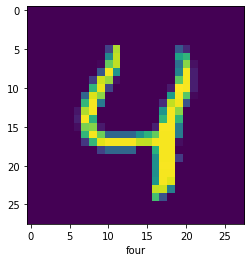

In [43]:
show_digit(X_test,y_pred,4)
print(classes[y_pred[4]])

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

